In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.nn import functional as F
from torch.utils.data import DataLoader


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
if torch.cuda.is_available():
 device = torch.device('cuda:0');
else:
 device = torch.device('cpu');

In [ ]:
data_transforms = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [ ]:
root = 'data'
train_dataset = MNIST(root, train = True, transform = data_transforms, download = True)
test_dataset = MNIST(root, train = False, transform = data_transforms, download = True)

batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size, shuffle = True)
test_dataloader = DataLoader(test_dataset, batch_size, shuffle = False)

100%|██████████| 9912422/9912422 [00:00<00:00, 103230343.73it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 102570443.54it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 35561670.32it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22952444.30it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
len(train_dataset)

60000

In [ ]:
len(test_dataset)

10000

torch.Size([1, 28, 28])


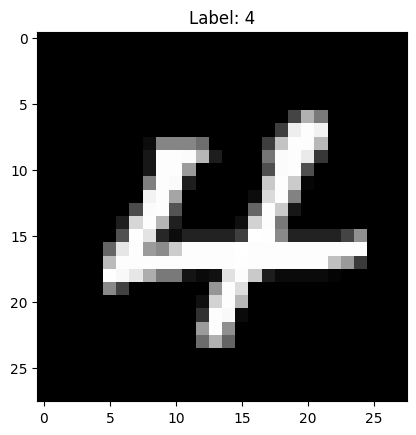

In [ ]:
for images, labels in train_dataloader:
    # Display one image
    print(images[0].shape)
    img = np.squeeze(images[0].numpy())  # Convert the torch tensor to a NumPy array and remove the singleton dimension
    plt.imshow(img, cmap='gray')
    plt.title(f'Label: {labels[0].item()}')
    plt.show()

    # Break the loop after displaying one image
    break

In [ ]:
UsualModel = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [ ]:
UsualModel

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=128, bias=True)
  (4): ReLU()
  (5): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
loaders = {'train' : train_dataloader, 'test' : test_dataloader}

In [ ]:
criterion = nn.CrossEntropyLoss() #Loss Function
optimizer = torch.optim.Adam(UsualModel.parameters())

In [ ]:
def fit(model, loaders, criterion, optimizer, epochs):
  accuracy = {"train": [], "valid": []}
  for epoch in range(epochs):
    for phase, dataloader in loaders.items():
      epoch_correct = 0
      epoch_total = 0
      for x_batch, y_batch in dataloader:
        if phase == 'train':
          model.train()
          optimizer.zero_grad()
          outp = model(x_batch)
        else:
          model.eval()
          with torch.no_grad():
            outp = model(x_batch)
        preds = outp.argmax(-1)
        correct = (preds == y_batch).sum()
        all = len(y_batch)
        epoch_correct += correct.item()
        epoch_total += all
        if phase == 'train':
          loss = criterion(outp, y_batch)
          loss.backward()
          optimizer.step()
      if phase == 'train':
        print(f"Epoch: {epoch+1}")
      print(f"Loader: {phase}. Accuracy: {epoch_correct/epoch_total}")
      accuracy[phase].append(epoch_correct/epoch_total)




In [ ]:
fit(UsualModel, loaders, criterion, optimizer, 5)

Epoch: 1
Loader: train. Accuracy: 0.8916833333333334
Epoch: 2
Loader: train. Accuracy: 0.9478833333333333
Epoch: 3
Loader: train. Accuracy: 0.96115
Epoch: 4
Loader: train. Accuracy: 0.96835
Epoch: 5
Loader: train. Accuracy: 0.9729166666666667


In [ ]:
class ConvNet(nn.Module):
     def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
     def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x


In [ ]:
model = ConvNet()

In [ ]:
fit(ConvNet(), loaders, criterion, optimizer, 10)

Epoch: 1
Loader: train. Accuracy: 0.09183333333333334
Loader: test. Accuracy: 0.0884


KeyError: ignored

In [ ]:
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

[1,   100] loss: 2.304
[1,   200] loss: 2.306
[1,   300] loss: 2.305
[1,   400] loss: 2.305
[1,   500] loss: 2.305
[1,   600] loss: 2.305
[1,   700] loss: 2.305
[1,   800] loss: 2.306
[1,   900] loss: 2.307
[2,   100] loss: 2.306
[2,   200] loss: 2.305
[2,   300] loss: 2.306
[2,   400] loss: 2.304
[2,   500] loss: 2.307
[2,   600] loss: 2.304
[2,   700] loss: 2.307
[2,   800] loss: 2.306
[2,   900] loss: 2.304
[3,   100] loss: 2.305
[3,   200] loss: 2.306
[3,   300] loss: 2.307
[3,   400] loss: 2.305
[3,   500] loss: 2.306
[3,   600] loss: 2.305
[3,   700] loss: 2.304
[3,   800] loss: 2.306
[3,   900] loss: 2.306
[4,   100] loss: 2.305
[4,   200] loss: 2.306
[4,   300] loss: 2.305
[4,   400] loss: 2.306
[4,   500] loss: 2.306
[4,   600] loss: 2.305
[4,   700] loss: 2.306
[4,   800] loss: 2.306
[4,   900] loss: 2.305
[5,   100] loss: 2.305
[5,   200] loss: 2.304
[5,   300] loss: 2.306
[5,   400] loss: 2.306
[5,   500] loss: 2.305
[5,   600] loss: 2.306
[5,   700] loss: 2.305
[5,   800] 